# HOMEWORK 2
For this homework you will have to complete and implement the colour balancing for:
* Gray world algorithm
* Scale-by-max algorithm

You are free to use your own images. Experiment with more images and think about the effect each of the algorithms has on the resulting (balanced) image.

### Colour Balancing
In this notebook we will show different type of colour balancing making use of von Kries' hypothesis.

In [4]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 5]

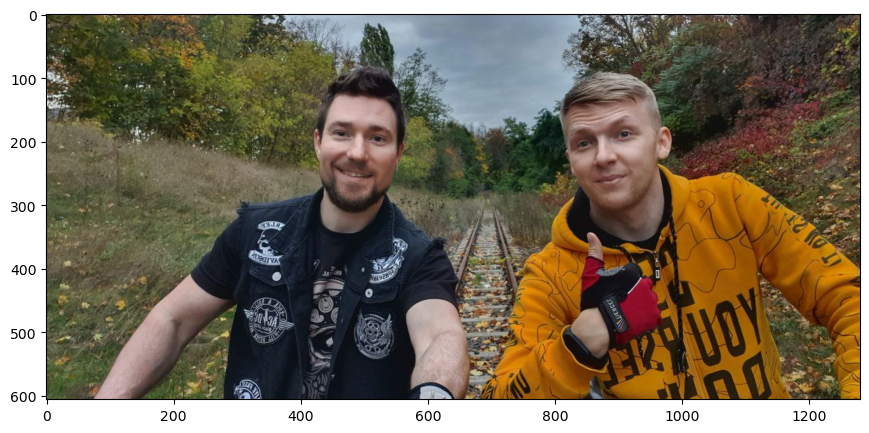

In [30]:
img = cv2.imread('../data/me-and-taras.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x7fe801f0fd90>)

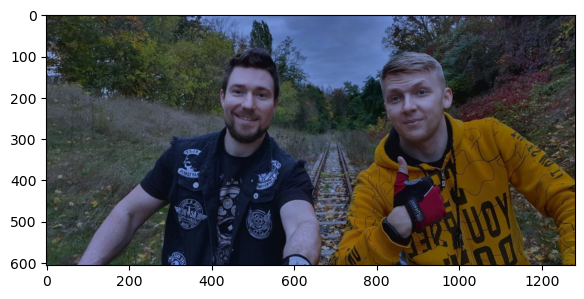

### Gray world
This algorithm assumes that a scene, on average, is gray.

(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x7fe7faeb3880>)

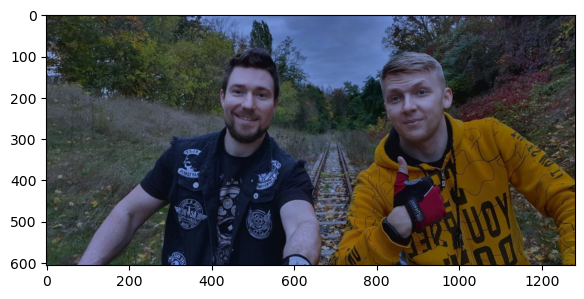

In [31]:
# Define white patch and the coefficients
row, col = 100, 100 
white = img[row, col, :]
coeffs = 255.0/white
coefR, coefG, coefB = coeffs[:3]
# Apply white balancing and generate balanced image
balanced = np.zeros_like(img, dtype=np.float32)
rows, cols, channels = img.shape

img_rgb = np.zeros_like(img)
r, g, b = img[...,0],img[...,1],img[...,2] # это будет R,G,B каждого пикселя
luminate_factor =[np.average(r),np.average(g),np.average(b)] # среднее зн-ние освещенности r,g,b 
scale_factor =  np.sum(luminate_factor) # сре-ние зн-ние освещенности

r= r * scale_factor / luminate_factor[0]
g= g * scale_factor / luminate_factor[1]
b= b * scale_factor / luminate_factor[2]

frame =np.dstack((r,g,b))
frame =cv2.normalize(frame,None,0,255,cv2.NORM_MINMAX,cv2.CV_8U)

plt.subplot(121), plt.imshow(frame)
#plt.subplot(122), plt.imshow(balanced)

In [ ]:
# Load your image
img = cv2.imread('...')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Compute the mean values for all three colour channels (red, green, blue)
mean_r = 
mean_g = 
mean_b = 

# Compute the coefficients kr, kg, kb
# Note: there are 3 coefficients to compute but we only have 2 equations.
# Therefore, you have to make an assumption, fix the value of one of the
# coefficients and compute the remining two
# Hint: You can fix the coefficient of the brightest colour channel to 1.
kr = 
kg = 
kb = 

# Apply color balancing and generate the balanced image
balanced = 

# Show the original and the balanced image side by side
plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(balanced)

### Scale-by-max
This is a straightforward algorithm that scales each colour channel by its maximum value. Note that it is sensitive to noise and saturations.

(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x7fe7fb0219d0>)

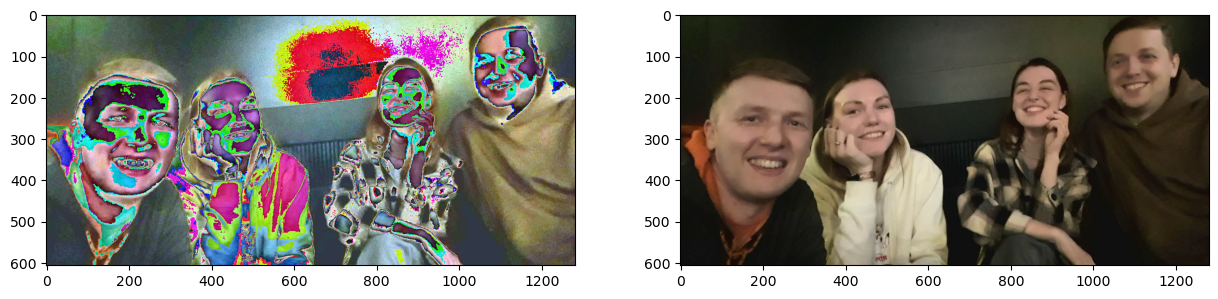

In [32]:
img = cv2.imread('../data/girls-in-the-dark.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
r, g, b = img[...,0],img[...,1],img[...,2] # это будет R каждого пикселя
max_luminate_rgb =[np.average(r), np.average(g), np.average(b)]

max_luminate_rgbData = np.zeros_like(max_luminate_rgb)
max_luminate_rgbData[...] = max_luminate_rgb
max_luminate_coefficient = 255 / max_luminate_rgbData
rows, cols, channels = img.shape
img_rgb = np.zeros_like(img)
for r in range(rows):
    for c in range(cols):
         pixel = img[r, c, :]
         img_rgb[r, c, ...] = pixel * max_luminate_coefficient

plt.subplot(122), plt.imshow(img)
plt.subplot(121), plt.imshow(img_rgb)